# Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

In [72]:
#Let's start with importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")

In [46]:
#Read csv file and convert into Dataframe
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


The above columns signify-

•	W- Number of predicted wins

•	R – Runs scored: number of times a player crosses home plate

•	AB – At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction

•	H – Hit: reaching base because of a batted, fair ball without error by the defense

•	2B – Double: hits on which the batter reaches second base safely without the contribution of a fielding error

•	3B – Triple: hits on which the batter reaches third base safely without the contribution of a fielding error

•	HR – Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error

•	BB– Walk-to-strikeout ratio: number of bases on balls divided by number of strikeouts

•	SO – Strikeout: number of batters who received strike three

•	SB – Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense

•	RA – Run average: number of runs allowed times nine divided by innings pitched

•	ER – Earned run: number of runs that did not occur as a result of errors or passed balls

•	ERA – Earned run average: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched

•	CG – Complete game: number of games where player was the only pitcher for their team

•	SHO – Shutout: number of complete games pitched with no runs allowed

•	SV – Save: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without 
surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings

•	E – Errors: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result

In [64]:
#shape of file
data.shape

(30, 17)

In [47]:
#Describe the data
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [48]:
#Check for null values
data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

# 
There are no null values

In [49]:
# Checking for data types of the columns
data.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

# 
As all the data fall under the numeric category, we do not need to apply any encoding technique

# Checking Correlation

In [50]:
data.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


# 
For better understanding let's use a heat map

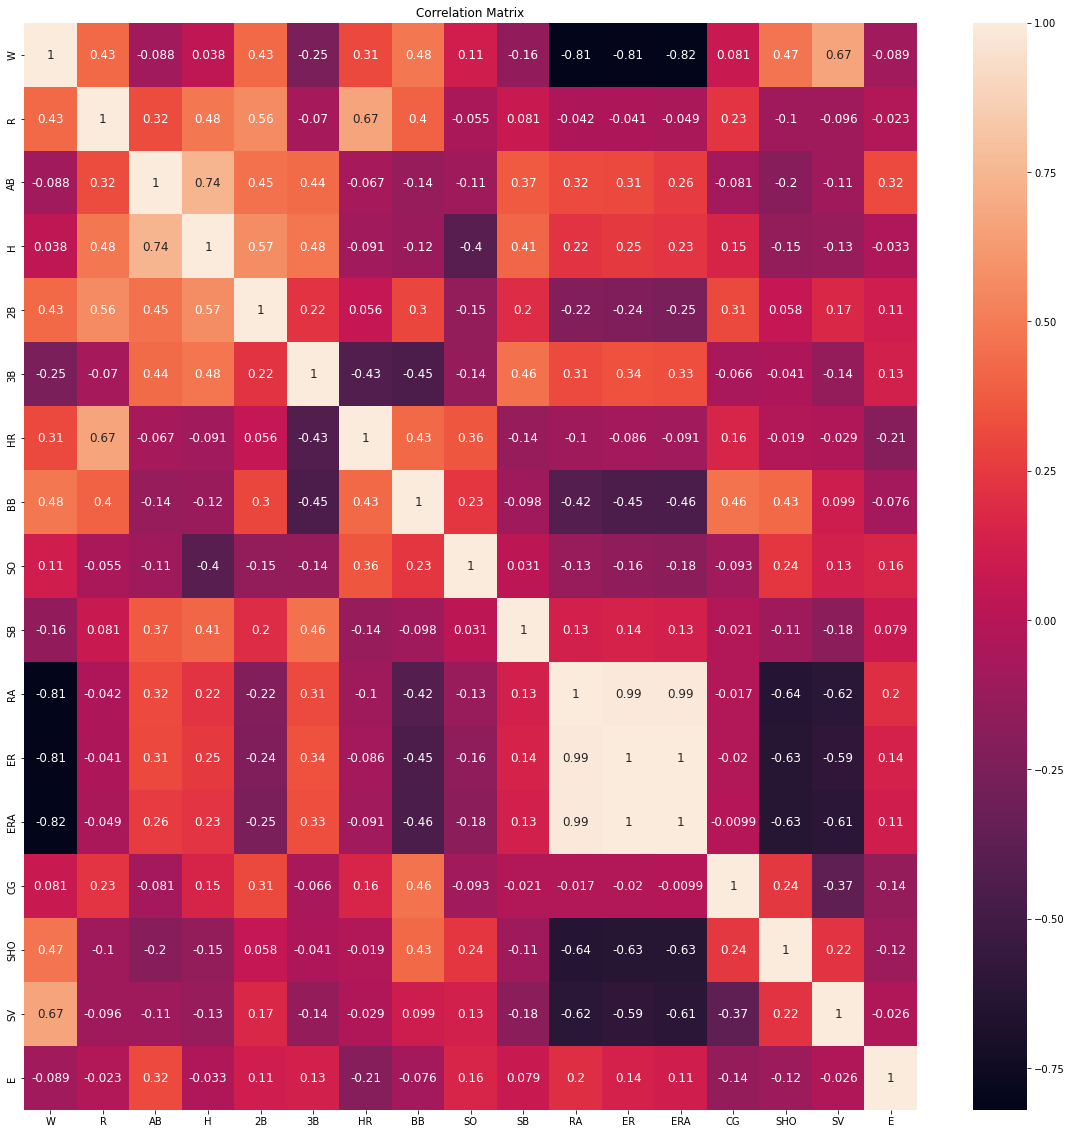

In [51]:
corr_mat=data.corr()

#size of the canvas
plt.figure(figsize=[20,20])

#plot the correlation matrix
sns.heatmap(corr_mat,annot=True, annot_kws={'size':12})
plt.title("Correlation Matrix")
plt.show()

# Observation-
Let's print the correlation values of independent values with target variable for a better understanding

In [52]:
corr_matrix=data.corr()
corr_matrix["W"].sort_values(ascending=True)

ERA   -0.819600
RA    -0.812952
ER    -0.809435
3B    -0.251118
SB    -0.157234
E     -0.089485
AB    -0.087947
H      0.037612
CG     0.080533
SO     0.111850
HR     0.307407
2B     0.427797
R      0.430751
SHO    0.471805
BB     0.484342
SV     0.666530
W      1.000000
Name: W, dtype: float64

# Observation-

- Features ERA, RA, ER, 3B, SB, E and AB are negatively correlated to the label W
- Features H, CG, SO, HR, 2B, R, SHO, BB and SV are positively correlated to the label W
- ERA (Earned Run Average) is 81% negatively correlated with W (number of predicted wins) showing a strong bond
- AB (At Bat) is 8% negatively correlated with W (number of predicted wins) showing a weak bond
- SV (Save) is 61% positively correlated with W (number of predicted wins) showing a strong bond
- H (Hit) is 3% positively correlated with W (number of predicted wins) showing a weak bond

# Divide Data Set into features and labels

In [53]:
y=data['W']
x=data.drop(columns=['W'])

# Visualizing Relationship

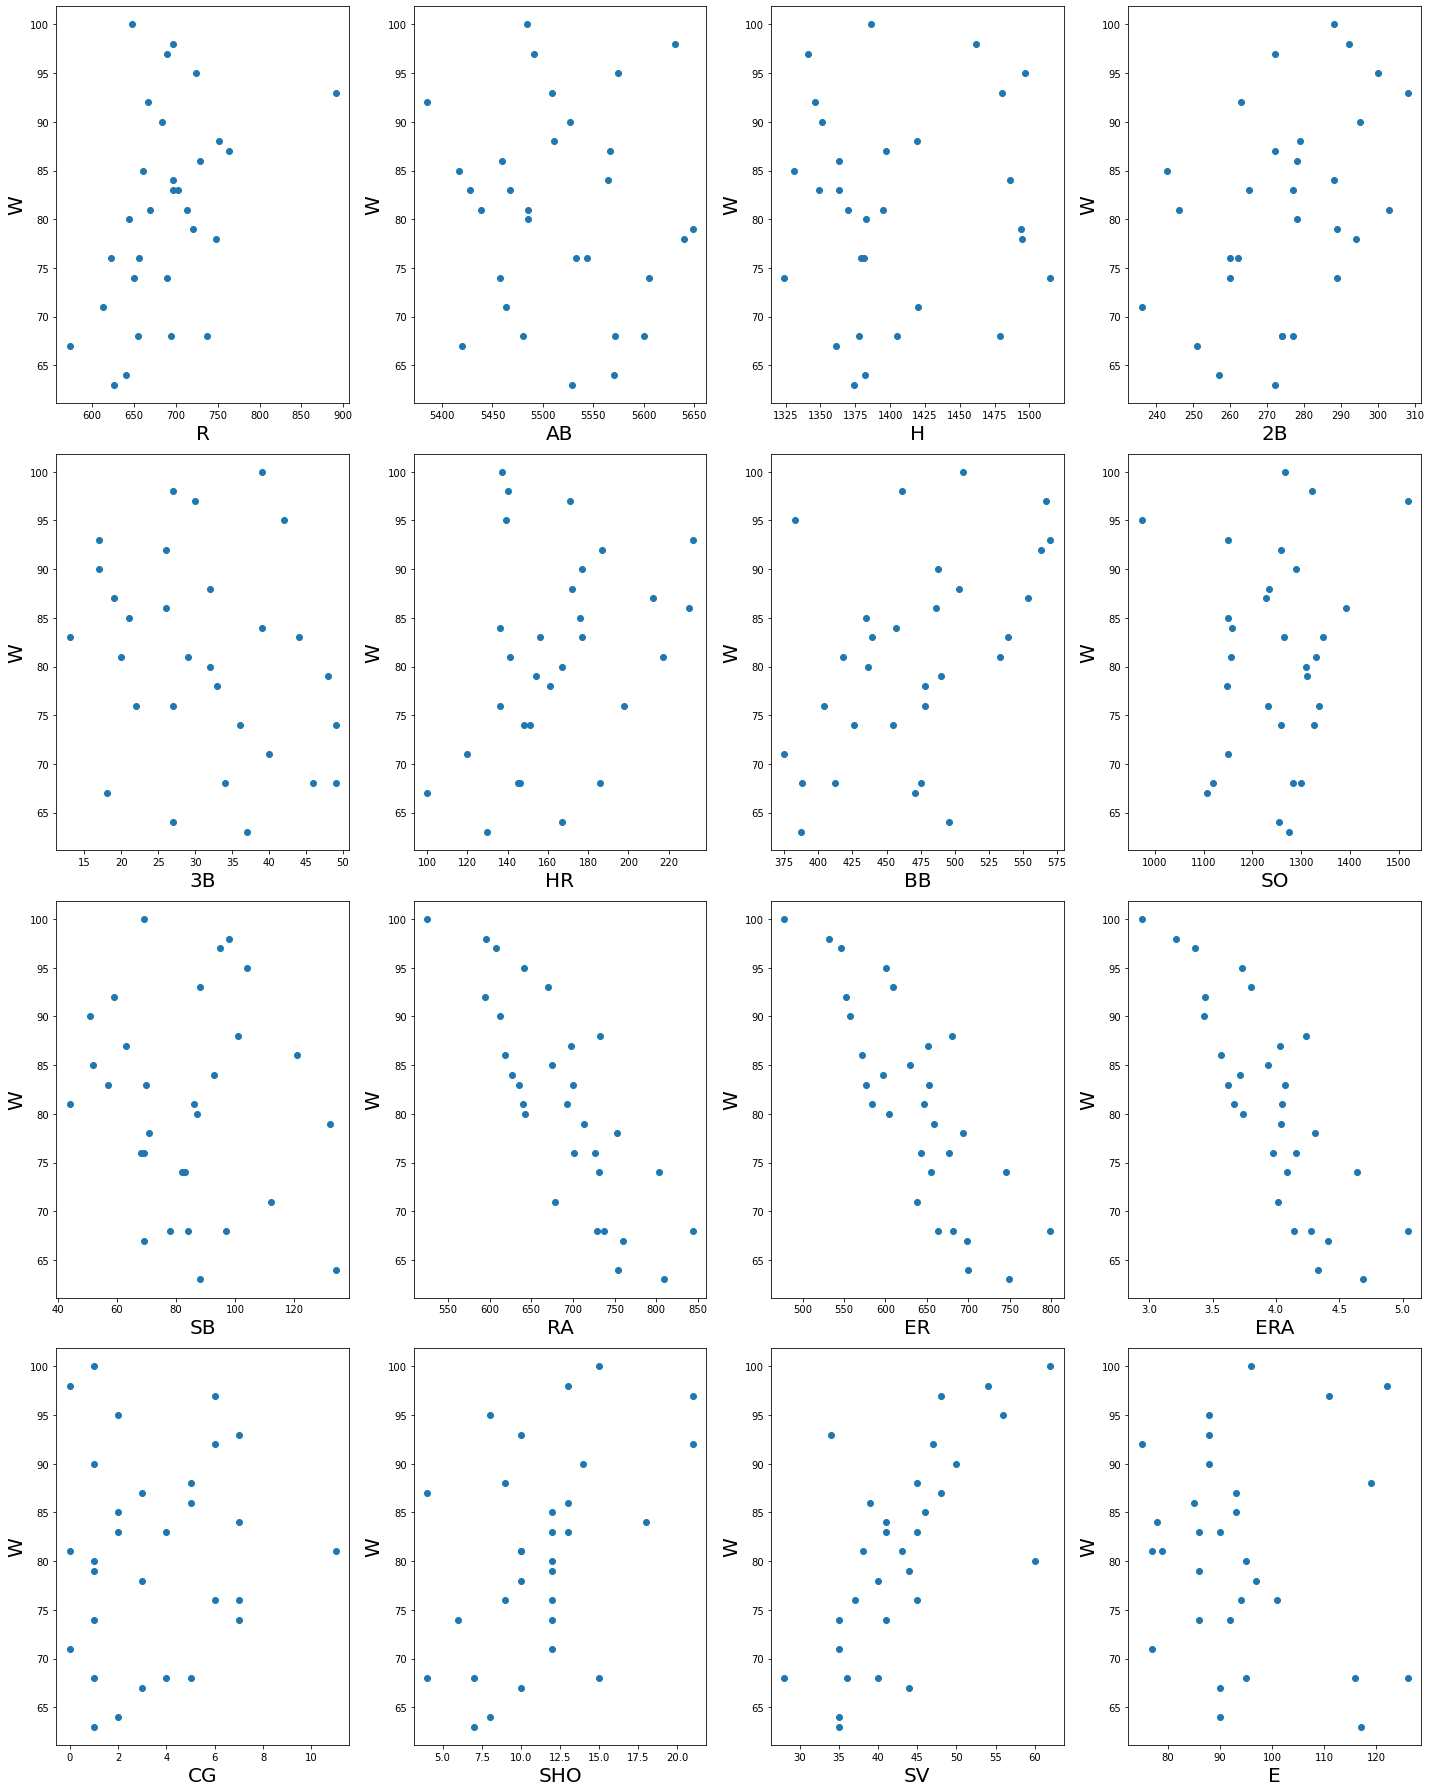

In [54]:
plt.figure(figsize=(20,25))
plotnumber=1

for column in x:
    if plotnumber<=17:
        ax=plt.subplot(4,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('W', fontsize=20)
    plotnumber=plotnumber+1
plt.tight_layout()

# Observation-

- Features ERA, RA, ER, 3B, SB, E and AB display negative linear regression  to the label W
- Features H, CG, SO, HR, 2B, R, SHO, BB and SV display positive linear regression to the label W

# Visualization of data

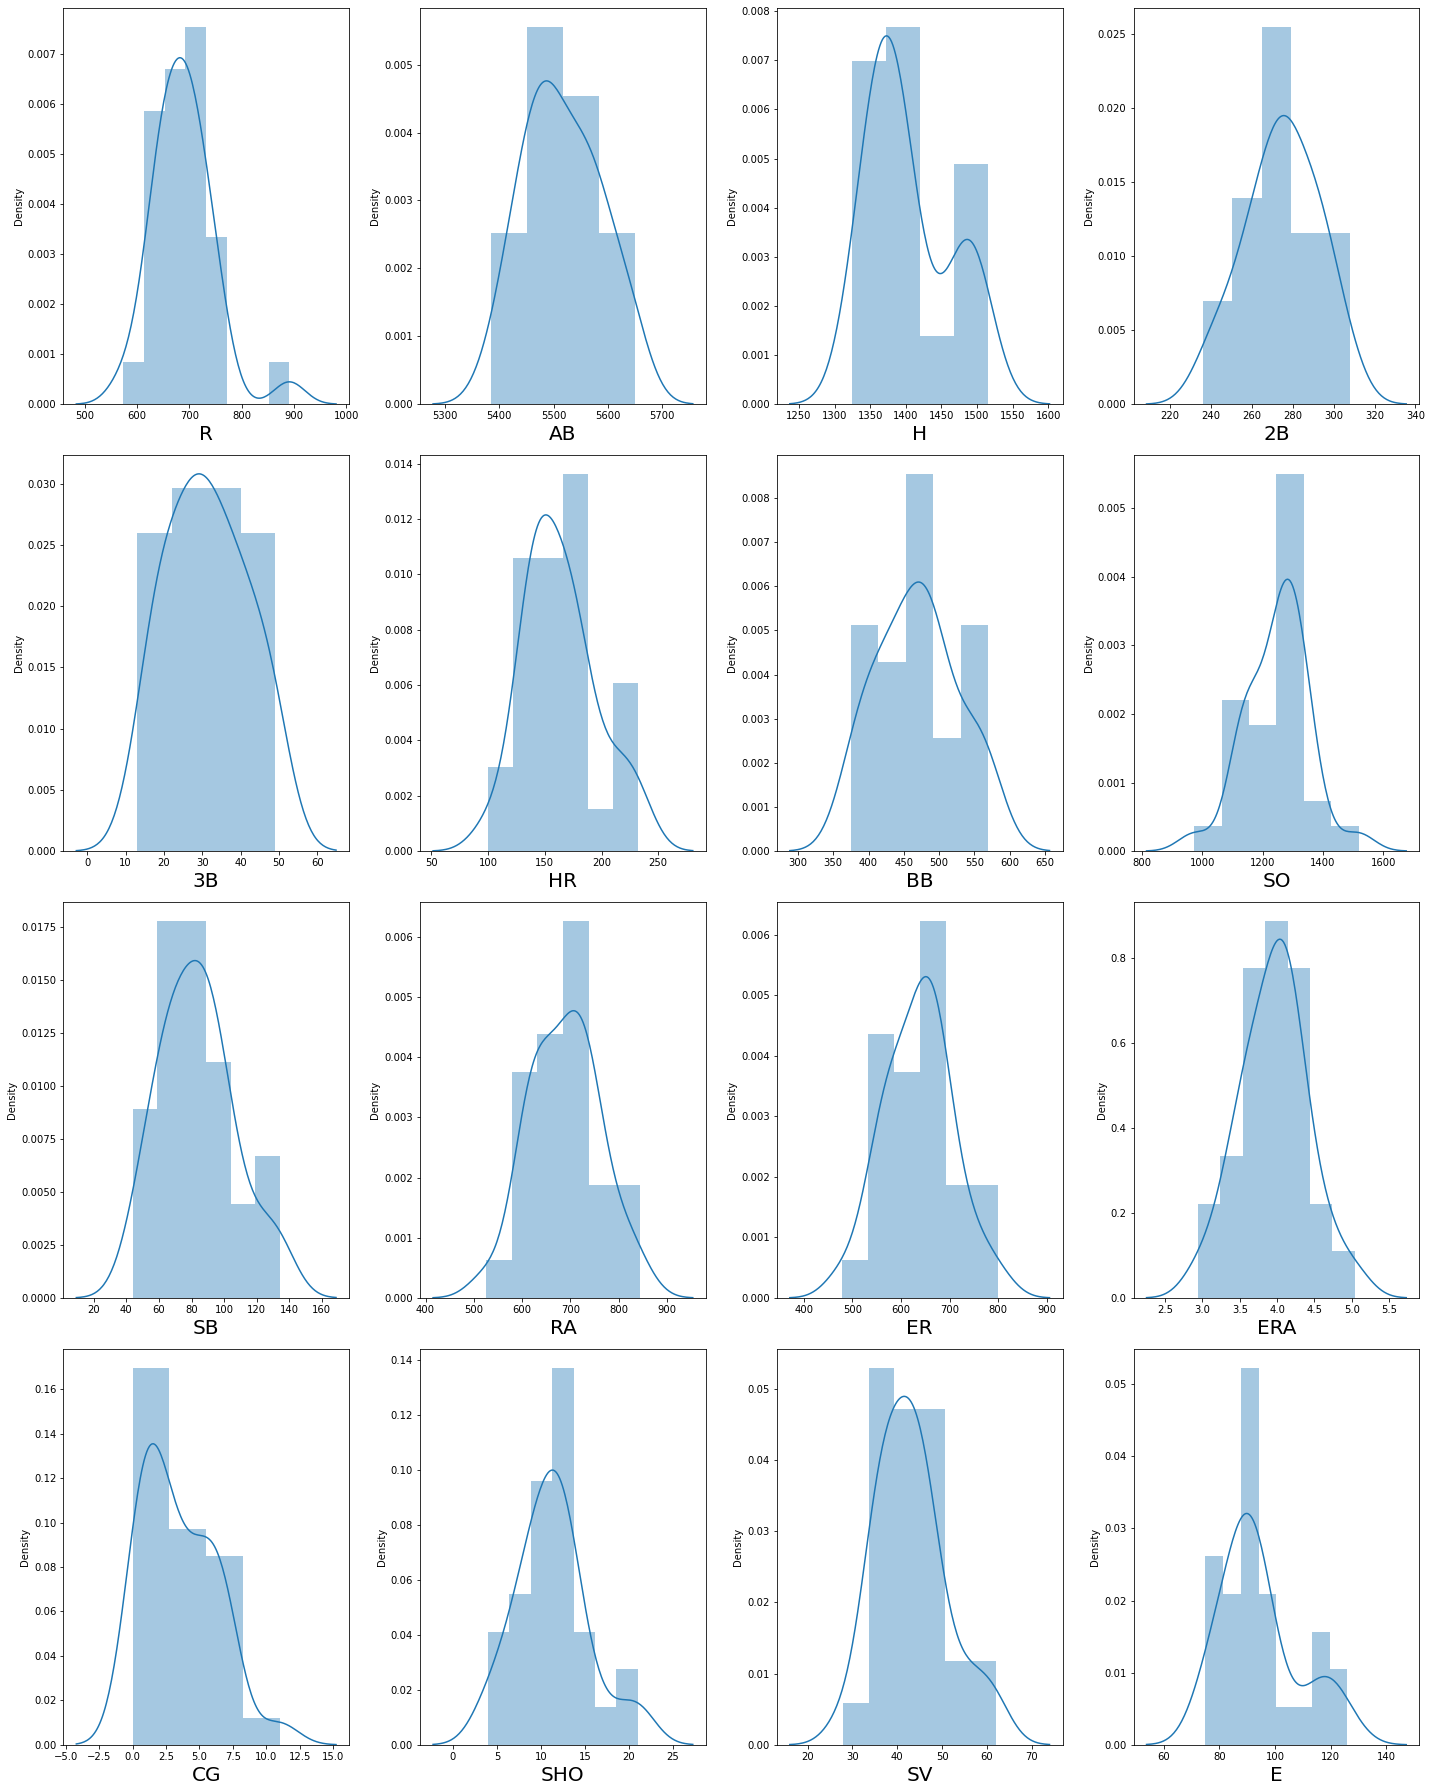

In [55]:
#Let's see how data is distributed for every column
plt.figure(figsize=(20,25))
plotnumber=1

for column in x:
    if plotnumber<=17:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
    plotnumber=plotnumber+1
plt.tight_layout()

# Observations-

Columns W, AB, 2B, 3B, BB, SB, ER, ERA display normal distribution
The other columns depict skewness

In [56]:
#Confirming the skewness
x.skew().sort_values(ascending=False)

R      1.200786
E      0.890132
CG     0.736845
H      0.670254
SV     0.657524
SHO    0.565790
HR     0.516441
SB     0.479893
AB     0.183437
BB     0.158498
3B     0.129502
ER     0.058710
ERA    0.053331
RA     0.045734
SO    -0.156065
2B    -0.230650
dtype: float64

# 
Keeping +/-0.5 as the range of skewness, the colmns not falling in this range are-
- R
- E
- CG
- H
- SV
- SHO
- HR

# Checking for outliers

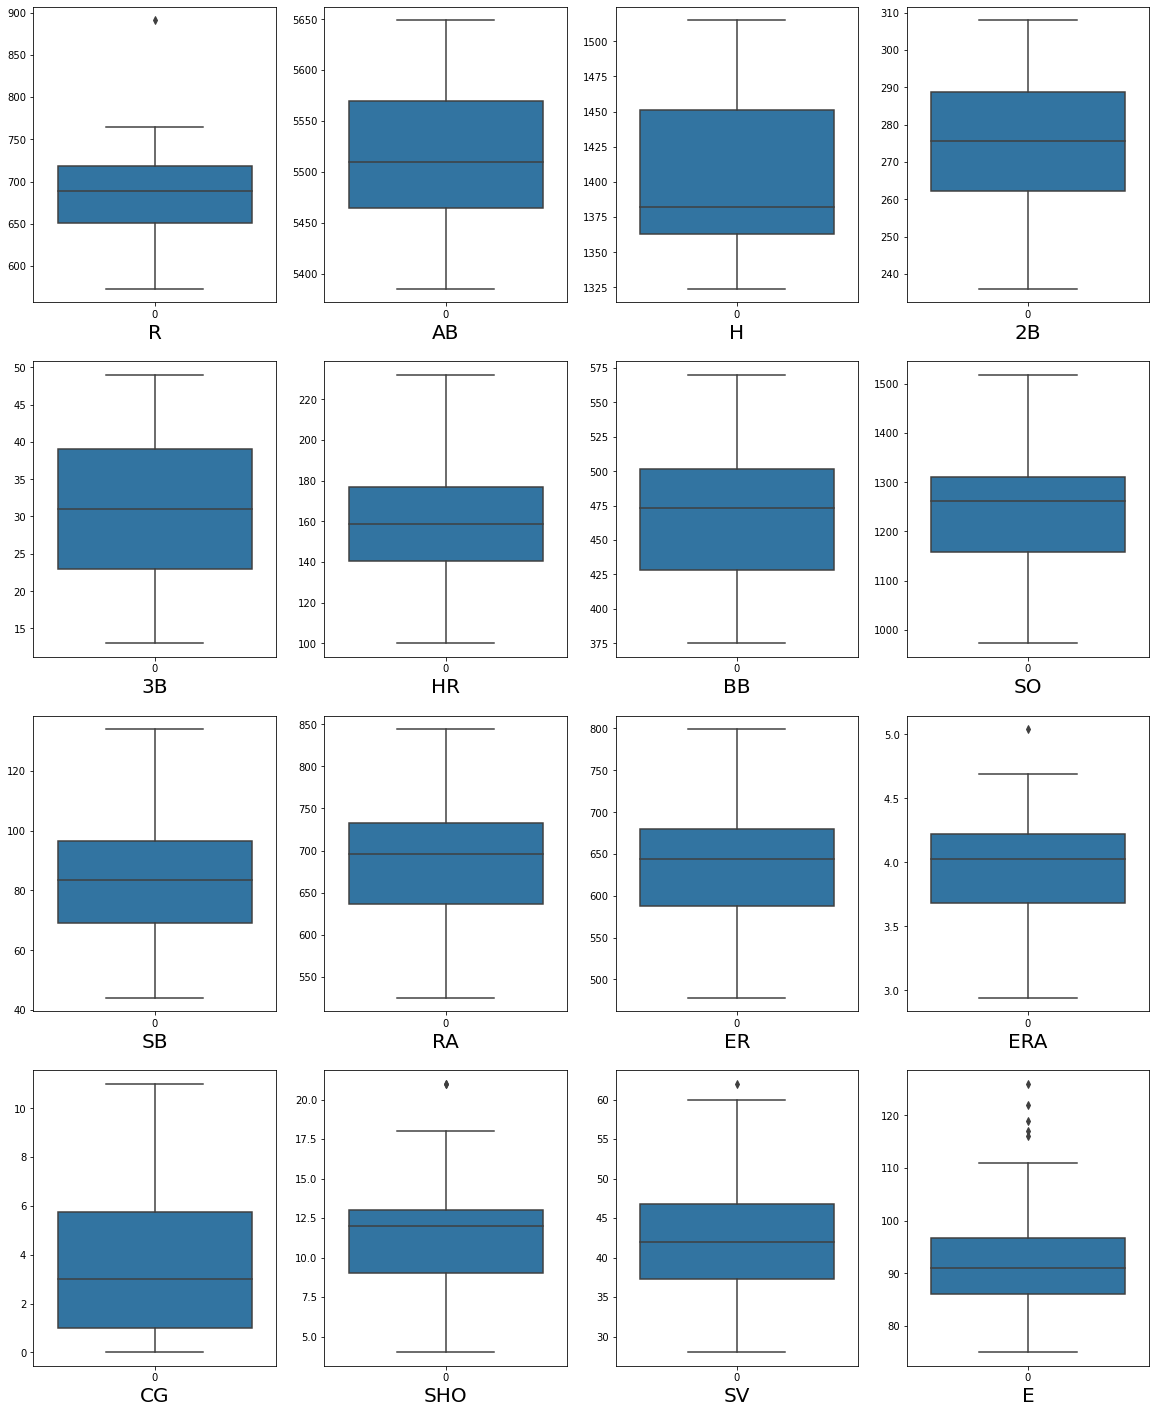

In [62]:
#visulaize the outliers using boxplot
plt.figure(figsize=(20,25))
graph=1

for column in x:
    if graph<=16:
        ax=plt.subplot(4,4,graph)
        sns.boxplot(data=x[column], orient='v')
        plt.xlabel(column,fontsize=20)
    graph=graph+1
plt.show()

# Observation-

The following features consist of outliers-
- R
- SHO
- SV
- E

# Removing outliers

In [63]:
#remove outliers using zscore technique
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(x))
z.shape

(30, 16)

In [65]:
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([0], dtype=int64))


In [66]:
x_new=x[(z<3).all(axis=1)]
print(x.shape)
print(x_new.shape)

(30, 16)
(29, 16)


# 
As the loss is of only one row, we shall continue without the applied zscore feature

# Transforming Data to remove skewness

In [86]:
from sklearn.preprocessing import power_transform
x_n=power_transform(x)

In [87]:
#Checking if skewness was rectified
x_skew=pd.DataFrame(x_n, columns=x.columns)
x_skew.skew().sort_values(ascending=False)

E      0.063909
SO     0.041170
SHO    0.006560
ERA    0.001746
SV     0.000836
R      0.000000
AB     0.000000
H      0.000000
HR    -0.000065
ER    -0.001940
BB    -0.007760
RA    -0.008082
SB    -0.010455
2B    -0.035315
CG    -0.059785
3B    -0.072933
dtype: float64

# Scaling the data

In [88]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(x_skew)

# Using Linear Regression Model

In [89]:
lr=LinearRegression()

#Finding Best random state
for i in range(0,100):
    features_train, features_test, target_train, target_test= train_test_split(X_scaled, y, test_size=0.2, random_state=i)
    lr.fit(features_train, target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print("At random state ",i, "the training accuracy is:- ",r2_score(target_train,pred_train))
    print("At random state ",i, "the testing accuracy is:- ",r2_score(target_test,pred_test))
    print("\n")

At random state  0 the training accuracy is:-  0.9403063127554103
At random state  0 the testing accuracy is:-  -2.5878965862579673


At random state  1 the training accuracy is:-  0.9420691103856618
At random state  1 the testing accuracy is:-  0.29799295994243813


At random state  2 the training accuracy is:-  0.9326889486944724
At random state  2 the testing accuracy is:-  -0.44113602632768734


At random state  3 the training accuracy is:-  0.9189535009772184
At random state  3 the testing accuracy is:-  0.32183250221547066


At random state  4 the training accuracy is:-  0.8652532206229739
At random state  4 the testing accuracy is:-  0.6416095875021944


At random state  5 the training accuracy is:-  0.8742398340434933
At random state  5 the testing accuracy is:-  0.7732211489189467


At random state  6 the training accuracy is:-  0.8925741384943691
At random state  6 the testing accuracy is:-  0.40383143484796724


At random state  7 the training accuracy is:-  0.89371036693872

In [90]:
#Applying the best random state found(i.e. 27)

features_train, features_test, target_train, target_test= train_test_split(X_scaled, y, test_size=0.2, random_state=27)
lr.fit(features_train, target_train)
pred_test=lr.predict(features_test)
print(r2_score(target_test,pred_test))

0.8892707517867269


# Cross Validation of the model

In [95]:
Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,X_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print("At cross fold ",j," the cv score is ", cv_mean," and accuracy score for the training is ",Train_accuracy," and the accuracy score for the testing is ",Test_accuracy)
    print("\n")

At cross fold  2  the cv score is  -6.419756338067611  and accuracy score for the training is  -0.729355608360664  and the accuracy score for the testing is  0.8892707517867269


At cross fold  3  the cv score is  -1.6344953701198566  and accuracy score for the training is  -0.729355608360664  and the accuracy score for the testing is  0.8892707517867269


At cross fold  4  the cv score is  -0.28839267362996257  and accuracy score for the training is  -0.729355608360664  and the accuracy score for the testing is  0.8892707517867269


At cross fold  5  the cv score is  -1.4228754457348083  and accuracy score for the training is  -0.729355608360664  and the accuracy score for the testing is  0.8892707517867269


At cross fold  6  the cv score is  -0.8835593699171856  and accuracy score for the training is  -0.729355608360664  and the accuracy score for the testing is  0.8892707517867269


At cross fold  7  the cv score is  -1.4916521845783581  and accuracy score for the training is  -0.7


Since the number of folds don't have such impact on the accuracy and cv score. So cv=4 is selected

Here we have handled the problem of the overfitting and the underfitting by checking the training and testing score

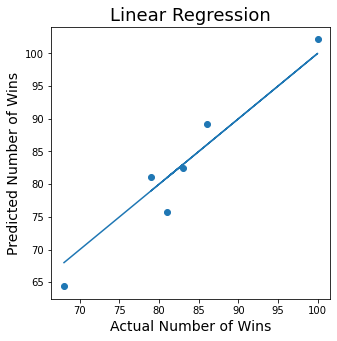

In [103]:
plt.figure(figsize=(5,5))
plt.scatter(x=target_test, y=pred_test)
plt.plot(target_test, target_test)
plt.xlabel('Actual Number of Wins', fontsize=14)
plt.ylabel('Predicted Number of Wins', fontsize=14)
plt.title('Linear Regression', fontsize=18)
plt.show()

# 
The Best Fit Line shows the least values of residuals, showing a good fit for our model

# Regularization

In [104]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001, .001, .01,.1, 1, 10], 'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [105]:
ls=Lasso(alpha=1, random_state=0)
ls.fit(features_train,target_train)
ls.score(features_train, target_train)
pred_ls=ls.predict(features_test)

lss=r2_score(target_test,pred_ls)
lss

0.9583244439281499

In [125]:
cv_score=cross_val_score(ls,X_scaled,y,cv=4)
cv_mean=cv_score.mean()
cv_mean

0.6203776028344842

# Using Random Forest Regressor Model

In [129]:
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'], 'max_features':["auto", "sqrt", "log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'log2'}


In [134]:
rf=RandomForestRegressor(criterion="mse", max_features="log2")
rf.fit(features_train, target_train)
rf.score(features_train, target_train)
pred_decision=rf.predict(features_test)

rfs=r2_score(target_test,pred_decision)
print('R2 Score: ', rfs*100)

rfscore=cross_val_score(rf,X_scaled,y,cv=4)
rfc=rfscore.mean()
print("Cross Val Score:", rfc*100)

R2 Score:  74.5092846177464
Cross Val Score: 38.54994204556505


# Observation-
Linear Regression with regularization fits better than the random forest regressor model

# Saving the Linear Regression Model

In [135]:
filename='Baseball Case Study.pkl'
pickle.dump(ls, open(filename,'wb'))